<img src=https://audiovisuales.icesi.edu.co/assets/custom/images/ICESI_logo_prin_descriptor_RGB_POSITIVO_0924.jpg width=200>


Integrantes: 

*Felipe Guerra, Eng.*

*Mavelyn Sterling, Eng.*

![indepensim inputs.jpg](<attachment:indepensim inputs.jpg>)
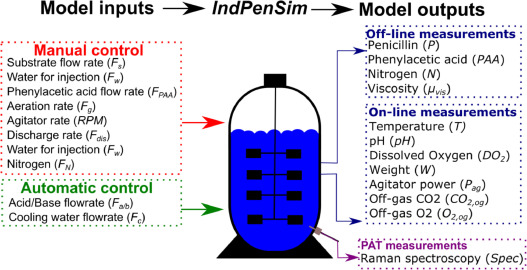

### **Contexto**  

El conjunto de datos fue generado mediante **IndPenSim**, una simulación matemática avanzada de un sistema de fermentación de penicilina de 100,000 litros. IndPenSim es la primera simulación que incorpora un dispositivo de espectroscopia Raman simulado para el desarrollo y evaluación de soluciones de control avanzadas en biotecnología.  

El conjunto de datos generado contiene **100 lotes** con mediciones detalladas del proceso y espectroscopia Raman (~2.5 GB), siendo ideal para análisis de big data, aprendizaje automático (ML) e inteligencia artificial (AI) en la industria biofarmacéutica.  

Los lotes se controlan con diferentes estrategias de control y duraciones típicas de manufactura biofarmacéutica:  
- **Lotes 1-30**: Controlados mediante un enfoque basado en recetas.  
- **Lotes 31-60**: Controlados por operadores.  
- **Lotes 61-90**: Controlados mediante un sistema de Control Avanzado de Procesos (APC) utilizando espectroscopia Raman.  
- **Lotes 91-100**: Contienen fallos que resultan en desviaciones del proceso.

# Instalar librerias

In [5]:
%pip install jupyter numpy pandas matplotlib seaborn scikit-learn tensorflow torch 


Note: you may need to restart the kernel to use updated packages.


# Cargar librerías necesarias

In [6]:

import numpy as np  
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


## Cargar los datos

In [7]:

# Ruta del archivo CSV 
dataset_path = r"C:\Users\mavel\Downloads\GitHub\proyecto_reto_insulina_INRAE\data\100_Batches_IndPenSim_V3.csv"


dataset = pd.read_csv(dataset_path)
# Mostrar las primeras filas del dataset
dataset.head()


,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
0,0.2,30,100,8,0.0000,30.118,9.8335,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,0.4,30,100,8,0.0000,51.221,18.1550,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
2,0.6,30,100,8,0.0000,54.302,9.5982,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,0.8,30,100,8,0.0000,37.816,4.3395,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
4,1.0,30,100,8,0.5181,18.908,1.1045,0.0001,0,0.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


## Análisis exploratorio

In [8]:
# Información general
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113935 entries, 0 to 113934
Columns: 2239 entries, Time (h) to 201
dtypes: float64(2225), int64(14)
memory usage: 1.9 GB


In [9]:
# Estadística descriptiva
dataset.describe()

,Time (h),Aeration rate(Fg:L/h),Agitator RPM(RPM:RPM),Sugar feed rate(Fs:L/h),Acid flow rate(Fa:L/h),Base flow rate(Fb:L/h),Heating/cooling water flow rate(Fc:L/h),Heating water flow rate(Fh:L/h),Water for injection/dilution(Fw:L/h),Air head pressure(pressure:bar),...,210,209,208,207,206,205,204,203,202,201
count,113935.000000,113935.000000,113935.0,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,113935.000000,...,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,1.139350e+05,0.0,0.0
mean,114.750656,65.246360,100.0,76.663764,0.073209,61.334389,74.346341,20.763025,154.811954,0.945026,...,1.414688e+06,1.422458e+06,1.429568e+06,1.435311e+06,1.439196e+06,1.441100e+06,1.441329e+06,1.440539e+06,NaN,NaN
std,66.990504,11.690215,0.0,25.680134,0.552788,44.972713,108.022600,50.230266,155.601474,0.134269,...,6.561401e+05,6.569029e+05,6.576540e+05,6.583792e+05,6.590689e+05,6.597212e+05,6.603415e+05,6.609441e+05,NaN,NaN
min,0.200000,20.000000,100.0,2.000000,0.000000,0.000000,0.000100,0.000100,0.000000,0.600000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,57.000000,60.000000,100.0,72.000000,0.000000,35.766000,11.157000,0.000100,0.000000,0.900000,...,8.384900e+05,8.457550e+05,8.523800e+05,8.575200e+05,8.608000e+05,8.620850e+05,8.617850e+05,8.604450e+05,NaN,NaN
50%,114.000000,65.000000,100.0,80.000000,0.000000,55.407000,34.384000,0.159010,100.000000,0.900000,...,1.421700e+06,1.429600e+06,1.436700e+06,1.442500e+06,1.446400e+06,1.448400e+06,1.448600e+06,1.447800e+06,NaN,NaN
75%,171.000000,75.000000,100.0,90.000000,0.000000,76.271500,94.904500,11.640500,250.000000,1.100000,...,1.964700e+06,1.973100e+06,1.980800e+06,1.987100e+06,1.991500e+06,1.994100e+06,1.994900e+06,1.994600e+06,NaN,NaN
max,290.000000,75.000000,100.0,150.000000,12.996000,225.000000,1500.000000,1500.000000,500.000000,1.100000,...,2.902800e+06,2.911800e+06,2.920100e+06,2.927200e+06,2.932700e+06,2.936400e+06,2.938300e+06,2.939400e+06,NaN,NaN



1. **Tiempo (h)**:
   - La variable "Time (h)" representa la duración del proceso, con un promedio de **114.75 horas** y un rango que va de **0.2 a 290 horas**.
   - La desviación estándar de **66.99 horas** indica una variabilidad considerable en los tiempos de operación.

2. **Tasa de aireación (Aeration rate, Fg:L/h)**:
   - Promedio: **65.25 L/h**, con valores que oscilan entre **20 y 75 L/h**.
   - La distribución es moderadamente concentrada, con un 50% de los valores entre **60 y 75 L/h**.

3. **Velocidad del agitador (Agitator RPM, RPM:RPM)**:
   - Valor constante de **100 RPM** en todas las mediciones, lo que sugiere que no ha habido variaciones en este parámetro.

4. **Tasa de alimentación de azúcar (Sugar feed rate, Fs:L/h)**:
   - Promedio: **76.66 L/h**, con una variación entre **2 y 150 L/h**.
   - Se observa una gran dispersión en los datos, ya que el 75% de los valores están por debajo de **90 L/h**, pero el máximo alcanza **150 L/h**.

5. **Flujo de ácido (Acid flow rate, Fa:L/h)**:
   - Promedio: **0.073 L/h**, con una desviación estándar de **0.552 L/h**, lo que indica que la mayoría de los valores son cercanos a **0**.
   - El valor máximo de **12.996 L/h** sugiere picos inusuales en la adición de ácido.

6. **Flujo de base (Base flow rate, Fb:L/h)**:
   - Media: **61.33 L/h**, con valores que oscilan entre **0 y 225 L/h**.
   - Aunque el mínimo es **0**, el percentil 25 ya tiene valores significativos (**35.77 L/h**), indicando que hay una distribución no uniforme del flujo de base.

7. **Flujo de agua de calentamiento/enfriamiento (Heating/cooling water flow rate, Fc:L/h)**:
   - Media: **74.35 L/h**, con valores entre **0.0001 y 1500 L/h**.
   - Se observa una gran dispersión en los datos, con un 75% de los valores por debajo de **94.9 L/h**, pero un máximo extremo de **1500 L/h**.

8. **Flujo de agua de calentamiento (Heating water flow rate, Fh:L/h)**:
   - Promedio: **20.76 L/h**, con valores desde **0.0001 hasta 1500 L/h**.
   - La gran diferencia entre el percentil 50 (**0.159 L/h**) y el máximo sugiere que hay picos de alto consumo en ciertas condiciones.

9. **Flujo de agua para inyección/dilución (Water for injection/dilution, Fw:L/h)**:
   - Media: **154.81 L/h**, con valores entre **0 y 500 L/h**.
   - La mayoría de los valores se concentran entre **0 y 250 L/h**, pero el máximo sugiere casos de alta demanda de agua de dilución.

10. **Presión del cabezal de aire (Air head pressure, pressure:bar)**:
    - Media: **0.945 bar**, con valores entre **0.6 y 1.1 bar**.
    - La presión se mantiene relativamente estable, con una baja desviación estándar (**0.134 bar**), lo que sugiere que el sistema mantiene un control adecuado sobre esta variable.



In [10]:
#columnas
dataset.columns

#lista del nombre de las columnas
list(dataset.columns)

['Time (h)',
 'Aeration rate(Fg:L/h)',
 'Agitator RPM(RPM:RPM)',
 'Sugar feed rate(Fs:L/h)',
 'Acid flow rate(Fa:L/h)',
 'Base flow rate(Fb:L/h)',
 'Heating/cooling water flow rate(Fc:L/h)',
 'Heating water flow rate(Fh:L/h)',
 'Water for injection/dilution(Fw:L/h)',
 'Air head pressure(pressure:bar)',
 'Dumped broth flow(Fremoved:L/h)',
 'Substrate concentration(S:g/L)',
 'Dissolved oxygen concentration(DO2:mg/L)',
 'Penicillin concentration(P:g/L)',
 'Vessel Volume(V:L)',
 'Vessel Weight(Wt:Kg)',
 'pH(pH:pH)',
 'Temperature(T:K)',
 'Generated heat(Q:kJ)',
 'carbon dioxide percent in off-gas(CO2outgas:%)',
 'PAA flow(Fpaa:PAA flow (L/h))',
 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))',
 'Oil flow(Foil:L/hr)',
 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))',
 'Oxygen Uptake Rate(OUR:(g min^{-1}))',
 'Oxygen in percent in off-gas(O2:O2  (%))',
 'Offline Penicillin concentration(P_offline:P(g L^{-1}))',
 'Offline Biomass concentratio(X_offline:X(g L^{-1}))',
 'Carbo

In [11]:
print(f"El dataset tiene {dataset.shape[1]} columnas.")
print("Nombres de las columnas:")
print(dataset.columns.tolist())  # Ver nombres de columnas

El dataset tiene 2239 columnas.
Nombres de las columnas:
['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Offline Biomass concentratio(X_

## Selección de variables

In [12]:
num_cols = min(36, dataset.shape[1])  # Asegurar que no seleccionemos más columnas de las disponibles
df = dataset.iloc[:, :num_cols]

print(f"Se han seleccionado {num_cols} columnas para EDA.")
print(df.head())  # Mostrar las primeras filas

Se han seleccionado 36 columnas para EDA.
   Time (h)  Aeration rate(Fg:L/h)  Agitator RPM(RPM:RPM)  \
0       0.2                     30                    100   
1       0.4                     30                    100   
2       0.6                     30                    100   
3       0.8                     30                    100   
4       1.0                     30                    100   

   Sugar feed rate(Fs:L/h)  Acid flow rate(Fa:L/h)  Base flow rate(Fb:L/h)  \
0                        8                  0.0000                  30.118   
1                        8                  0.0000                  51.221   
2                        8                  0.0000                  54.302   
3                        8                  0.0000                  37.816   
4                        8                  0.5181                  18.908   

   Heating/cooling water flow rate(Fc:L/h)  Heating water flow rate(Fh:L/h)  \
0                                   9.8335 

In [13]:
print(f"El dataset tiene {df.shape[1]} columnas.")
print("Nombres de las columnas:")
print(df.columns.tolist())  # Ver nombres de columnas

El dataset tiene 36 columnas.
Nombres de las columnas:
['Time (h)', 'Aeration rate(Fg:L/h)', 'Agitator RPM(RPM:RPM)', 'Sugar feed rate(Fs:L/h)', 'Acid flow rate(Fa:L/h)', 'Base flow rate(Fb:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'Heating water flow rate(Fh:L/h)', 'Water for injection/dilution(Fw:L/h)', 'Air head pressure(pressure:bar)', 'Dumped broth flow(Fremoved:L/h)', 'Substrate concentration(S:g/L)', 'Dissolved oxygen concentration(DO2:mg/L)', 'Penicillin concentration(P:g/L)', 'Vessel Volume(V:L)', 'Vessel Weight(Wt:Kg)', 'pH(pH:pH)', 'Temperature(T:K)', 'Generated heat(Q:kJ)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'PAA flow(Fpaa:PAA flow (L/h))', 'PAA concentration offline(PAA_offline:PAA (g L^{-1}))', 'Oil flow(Foil:L/hr)', 'NH_3 concentration off-line(NH3_offline:NH3 (g L^{-1}))', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Oxygen in percent in off-gas(O2:O2  (%))', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Offline Biomass concentratio(X_of

**Interpretación de las variables**

1. **Time (h)**: Tiempo transcurrido en horas desde el inicio del proceso de fermentación.

2. **Aeration rate (Fg:L/h)**: Tasa de aireación en litros por hora, que controla la cantidad de oxígeno suministrado al biorreactor para mantener condiciones aeróbicas.

3. **Agitator RPM (RPM:RPM)**: Velocidad del agitador en revoluciones por minuto (RPM), utilizada para mezclar el medio de cultivo y mejorar la transferencia de oxígeno y nutrientes.

4. **Sugar feed rate (Fs:L/h)**: Tasa de alimentación de azúcar en litros por hora, que proporciona la fuente de carbono necesaria para el crecimiento de los microorganismos y la producción de penicilina.

5. **Acid flow rate (Fa:L/h)**: Flujo de ácido en litros por hora, utilizado para ajustar el pH del medio de cultivo.

6. **Base flow rate (Fb:L/h)**: Flujo de base en litros por hora, utilizado para contrarrestar la acidificación del medio de cultivo y mantener el pH en un rango óptimo.

7. **Heating/cooling water flow rate (Fc:L/h)**: Flujo de agua de calefacción o enfriamiento en litros por hora, que regula la temperatura dentro del biorreactor.

8. **Heating water flow rate (Fh:L/h)**: Flujo de agua caliente en litros por hora, que se usa para calentar el medio de cultivo.

9. **Water for injection/dilution (Fw:L/h)**: Agua utilizada para inyección o dilución del medio de cultivo en litros por hora.

10. **Air head pressure (pressure:bar)**: Presión de aire en el cabezal del biorreactor en bares, que influye en la transferencia de oxígeno y la mezcla del medio.

11. **Dumped broth flow (Fremoved:L/h)**: Flujo de caldo retirado en litros por hora, indicando la cantidad de líquido que se extrae del biorreactor, posiblemente como parte de un proceso de purga o cosecha.

12. **Substrate concentration (S:g/L)**: Concentración de sustrato (azúcar o fuente de carbono) en gramos por litro, que es utilizado por los microorganismos para su metabolismo.

13. **Dissolved oxygen concentration (DO2:mg/L)**: Concentración de oxígeno disuelto en miligramos por litro, crucial para el crecimiento y metabolismo de los microorganismos productores de penicilina.

14. **Penicillin concentration (P:g/L)**: Concentración de penicilina en gramos por litro, indicando la cantidad de producto generado en el proceso.

15. **Vessel Volume (V:L)**: Volumen del biorreactor en litros, que puede variar debido a la adición de líquidos o eliminación de caldo fermentado.

16. **Vessel Weight (Wt:Kg)**: Peso del biorreactor en kilogramos, que depende del volumen y la densidad del medio de cultivo.

17. **pH (pH:pH)**: pH del medio de cultivo, fundamental para el crecimiento óptimo de los microorganismos y la producción de penicilina.

18. **Temperature (T:K)**: Temperatura del medio de cultivo en Kelvin, que afecta la tasa de crecimiento microbiano y la producción de penicilina.

19. **Generated heat (Q:kJ)**: Cantidad de calor generado en el proceso de fermentación en kilojulios, que puede indicar la actividad metabólica de los microorganismos.

20. **Carbon dioxide percent in off-gas (CO2outgas:%)**: Porcentaje de dióxido de carbono en el gas de salida, que refleja la tasa de respiración microbiana.

21. **PAA flow (Fpaa:L/h)**: Flujo de ácido peracético en litros por hora, un agente oxidante utilizado para controlar la contaminación y mejorar la producción.

22. **PAA concentration offline (PAA_offline:g/L)**: Concentración de ácido peracético medida fuera de línea en gramos por litro.

23. **Oil flow (Foil:L/h)**: Flujo de aceite en litros por hora, que puede usarse como fuente de carbono o para controlar la espuma en el biorreactor.

24. **NH₃ concentration offline (NH3_offline:g/L)**: Concentración de amoníaco medida fuera de línea en gramos por litro, utilizada para controlar el balance de nitrógeno en el medio de cultivo.

25. **Oxygen Uptake Rate (OUR:g/min)**: Tasa de consumo de oxígeno en gramos por minuto, que indica la actividad metabólica de los microorganismos.

26. **Oxygen in percent in off-gas (O2:%)**: Porcentaje de oxígeno en el gas de salida, que ayuda a evaluar la eficiencia de la transferencia de oxígeno en el biorreactor.

27. **Offline Penicillin concentration (P_offline:g/L)**: Concentración de penicilina medida fuera de línea en gramos por litro, usada para calibrar mediciones en línea.

28. **Offline Biomass concentration (X_offline:g/L)**: Concentración de biomasa medida fuera de línea en gramos por litro, indicando la cantidad de microorganismos en el medio.

29. **Carbon evolution rate (CER:g/h)**: Tasa de evolución de carbono en gramos por hora, reflejando la actividad metabólica y la conversión de sustratos en dióxido de carbono.

30. **Ammonia shots (NH3_shots:kgs)**: Cantidad de inyecciones de amoníaco en kilogramos, usada para ajustar la concentración de nitrógeno en el medio.

31. **Viscosity (Viscosity_offline:centPoise)**: Viscosidad del medio de cultivo medida fuera de línea en centipoises, que afecta la transferencia de oxígeno y la mezcla del biorreactor.

32. **Fault reference (Fault_ref:Fault ref)**: Referencia de fallas en el sistema, posiblemente utilizada para monitoreo y control del proceso.

33. **0 - Recipe driven 1 - Operator controlled (Control_ref:Control ref)**: Variable que indica si el proceso está siendo controlado por una receta automatizada (0) o por un operador manualmente (1).

34. **1- No Raman spec**: Indica si no se ha utilizado espectroscopia Raman en el monitoreo del proceso.

35. **1-Raman spec recorded**: Indica si se ha registrado datos de espectroscopia Raman.

36. **2-PAT control (PAT_ref:PAT ref)**: Indica si se está utilizando control de Proceso Analítico Tecnológico (PAT) para optimizar el proceso de fermentación.



### Correlación

c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\lib\_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


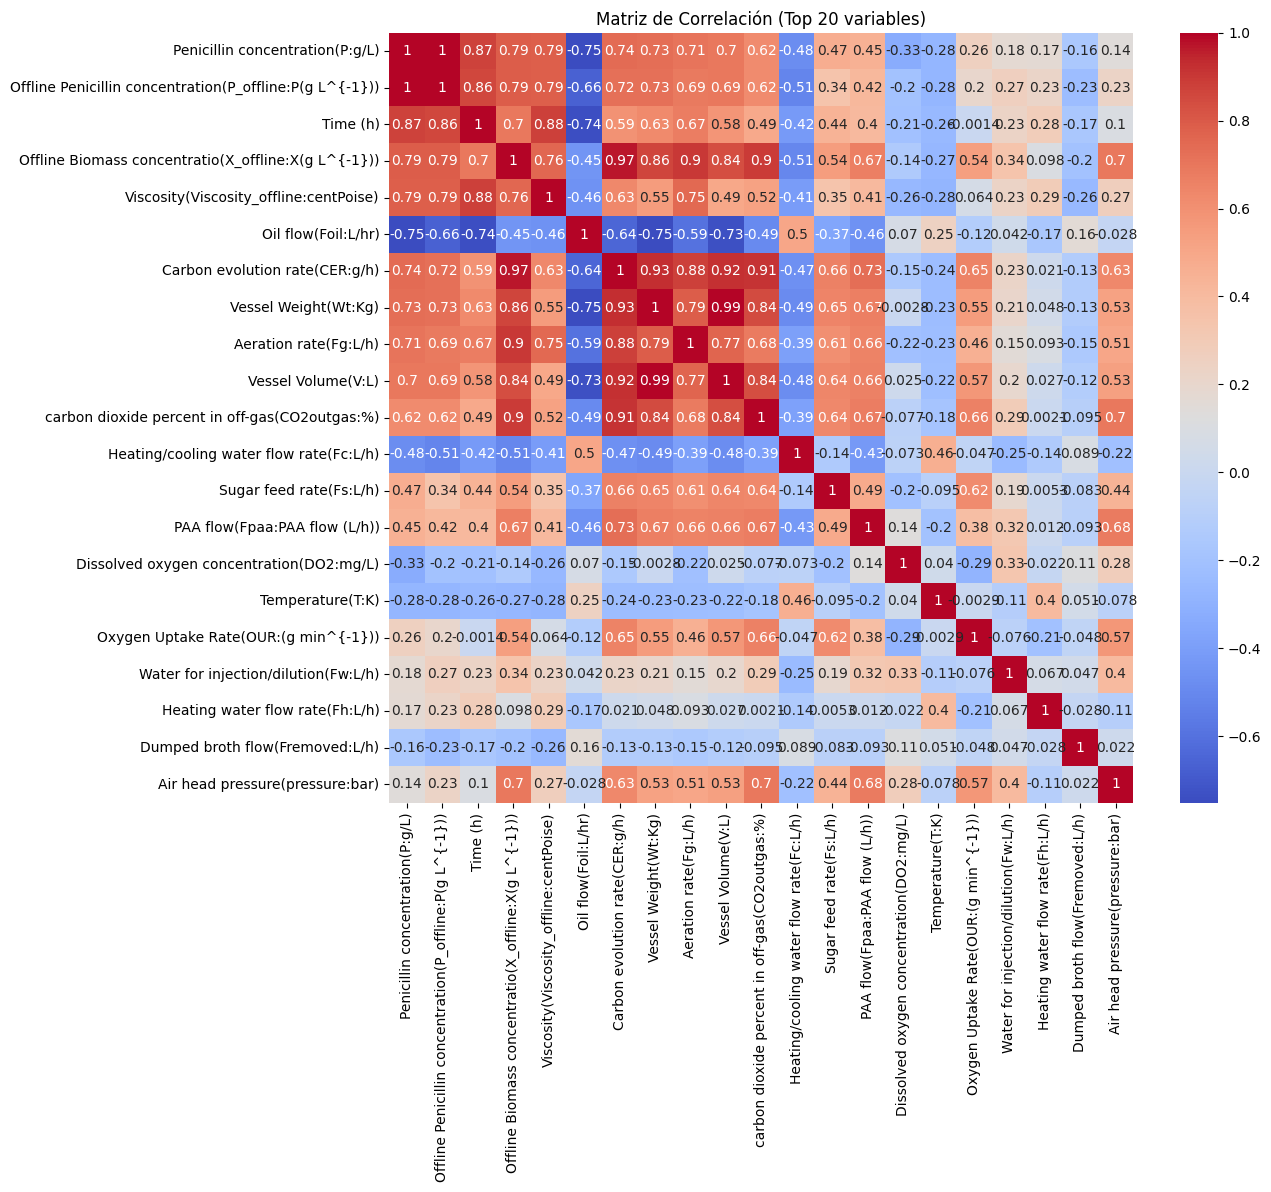

Variables seleccionadas: ['Penicillin concentration(P:g/L)', 'Offline Penicillin concentration(P_offline:P(g L^{-1}))', 'Time (h)', 'Offline Biomass concentratio(X_offline:X(g L^{-1}))', 'Viscosity(Viscosity_offline:centPoise)', 'Oil flow(Foil:L/hr)', 'Carbon evolution rate(CER:g/h)', 'Vessel Weight(Wt:Kg)', 'Aeration rate(Fg:L/h)', 'Vessel Volume(V:L)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Heating/cooling water flow rate(Fc:L/h)', 'Sugar feed rate(Fs:L/h)', 'PAA flow(Fpaa:PAA flow (L/h))', 'Dissolved oxygen concentration(DO2:mg/L)', 'Temperature(T:K)', 'Oxygen Uptake Rate(OUR:(g min^{-1}))', 'Water for injection/dilution(Fw:L/h)', 'Heating water flow rate(Fh:L/h)', 'Dumped broth flow(Fremoved:L/h)', 'Air head pressure(pressure:bar)']


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def select_top_correlated_features(df, target_variable, top_n=20):
    # Calcular correlaciones individuales con la variable objetivo
    correlations = df.corrwith(df[target_variable]).abs().sort_values(ascending=False)

    # Seleccionar las top_n variables más correlacionadas (incluyendo la variable objetivo)
    top_features = correlations.head(top_n + 1).index.tolist()

    # Crear dataset reducido
    reduced_dataset = df[top_features]

    # Mostrar matriz de correlación solo con las variables seleccionadas
    plt.figure(figsize=(12, 10))
    sns.heatmap(reduced_dataset.corr(), cmap='coolwarm', annot=True)
    plt.title('Matriz de Correlación (Top 20 variables)')
    plt.show()

    print(f"Variables seleccionadas: {top_features}")

    return reduced_dataset


target_variable = "Penicillin concentration(P:g/L)"
df = select_top_correlated_features(df, target_variable)


**Interpretación del mapa de calor**
- **Rojo oscuro (correlación fuerte, >0.7):** Variables que aumentan junto con la producción de penicilina.
- **Rojo medio (correlación moderada, 0.4 a 0.7):** Variables con impacto relevante pero no determinante.
- **Blanco o gris (correlación débil, entre -0.4 y 0.4):** Variables sin una relación clara con la penicilina.
- **Azul oscuro (correlación negativa fuerte, < -0.4):** Variables que disminuyen cuando la producción de penicilina aumenta.

---

**1. Variables con correlación positiva fuerte con la Penicilina (Rojo oscuro, cercanas a 1)**  
Estas variables están fuertemente relacionadas con el aumento en la producción de penicilina.

| **Variable** | **Correlación con Penicillin concentration (P:g/L)** | **Interpretación** |
|-------------|-----------------------------------------------------|-------------------|
| **Offline Penicillin concentration (P_offline:P g/L⁻¹)** | **1.00** | Es la misma variable medida en diferentes condiciones (online vs offline). |
| **Time (h)** | **0.87** | A medida que avanza la fermentación, la producción de penicilina aumenta. |
| **Offline Biomass concentration (X_offline:X g/L⁻¹)** | **0.79** | Un mayor crecimiento celular favorece la producción de penicilina. |
| **Viscosity (Viscosity_offline:centPoise)** | **0.79** | La viscosidad del medio aumenta junto con la biomasa y la producción de penicilina. |
| **Carbon evolution rate (CER:g/h)** | **0.74** | La producción de CO₂ indica un metabolismo celular activo, clave en la síntesis de penicilina. |
| **Aeration rate (Fg:L/h)** | **0.71** | Una mayor aireación favorece la oxigenación del medio, necesaria para la fermentación. |
| **Vessel Weight (Wt:Kg)** | **0.70** | El peso del biorreactor refleja el aumento en biomasa y producto acumulado. |

 **Conclusión:** **El tiempo de fermentación, la biomasa, la viscosidad del medio y la producción de CO₂ están estrechamente ligados a la producción de penicilina.**  

---

**2. Variables con correlación moderada con la Penicilina (Rojo medio, 0.4 a 0.7)**
Estas variables tienen un impacto relevante en la producción de penicilina.

| **Variable** | **Correlación con Penicillin concentration (P:g/L)** | **Interpretación** |
|-------------|-----------------------------------------------------|-------------------|
| **carbon dioxide percent in off-gas (CO₂outgas:%)** | **0.62** | Una alta producción de CO₂ sugiere una alta actividad metabólica. |
| **Sugar feed rate (Fs:L/h)** | **0.47** | El suministro de azúcar proporciona la energía necesaria para la síntesis de penicilina. |
| **PAA flow (Fpaa:L/h)** | **0.45** | La adición de PAA está relacionada con el control del proceso y su optimización. |

**Conclusión:** **El oxígeno, el flujo de PAA y la alimentación de azúcar favorecen la producción de penicilina, aunque no de manera tan determinante como el crecimiento de biomasa y el tiempo de fermentación.**  

---

**3. Variables con correlación débil con la Penicilina (Blanco o gris, entre -0.4 y 0.4)**
Estas variables no tienen una relación clara con la producción de penicilina.

| **Variable** | **Correlación con Penicillin concentration (P:g/L)** | **Interpretación** |
|-------------|-----------------------------------------------------|-------------------|
| **Oxygen Uptake Rate (OUR:g/min)** | **0.26** | Un metabolismo más activo puede aumentar la producción, pero la relación no es fuerte. |
| **Water for injection/dilution (Fw:L/h)** | **0.18** | La cantidad de agua añadida para dilución no parece estar fuertemente ligada a la producción de penicilina. |
| **Heating water flow rate (Fh:L/h)** | **0.17** | La cantidad de agua caliente usada en el proceso no influye directamente en la producción de penicilina. |
| **Air head pressure (pressure:bar)** | **0.14** | La presión de aire no parece ser un factor crítico en la síntesis de penicilina. |

**Conclusión:** **Estas variables pueden influir en otros aspectos del proceso, pero no son determinantes en la producción de penicilina.**

---

**4. Variables con correlación negativa con la Penicilina (Azul oscuro, < -0.4)**
Estas variables disminuyen cuando la producción de penicilina aumenta.

| **Variable** | **Correlación con Penicillin concentration (P:g/L)** | **Interpretación** |
|-------------|-----------------------------------------------------|-------------------|
| **Heating/cooling water flow rate (Fc:L/h)** | **-0.48** | Un mayor flujo de agua de enfriamiento puede indicar fluctuaciones de temperatura que afectan la fermentación. |
| **Dissolved oxygen concentration (DO₂:mg/L)** | **-0.33** | Un exceso de oxígeno disuelto podría indicar una menor actividad metabólica. |
| **Temperature (T:K)** | **-0.28** | Fluctuaciones en la temperatura pueden afectar negativamente la estabilidad de los microorganismos. |

 **Conclusión:** **El control de la temperatura y del flujo de agua de enfriamiento es crucial para evitar impactos negativos en la producción de penicilina. Un exceso de oxígeno disuelto también puede ser perjudicial.**

---

 **5. Resumen Final**
- **Variables clave para aumentar la producción de penicilina (rojo oscuro, fuerte correlación positiva):**  
  - **Tiempo de fermentación, biomasa, viscosidad del medio y producción de CO₂.**
- **Variables secundarias pero importantes (rojo medio, moderada correlación positiva):**  
  - **Tasa de aireación, alimentación de azúcar y flujo de PAA.**
- **Variables con baja influencia (blanco o gris, correlación débil):**  
  - **Tasa de consumo de oxígeno (OUR), flujo de agua de dilución e inyección.**
- **Factores que pueden afectar negativamente la producción (azul oscuro, correlación negativa):**  
  - **Fluctuaciones en temperatura y flujo de agua de enfriamiento, así como un exceso de oxígeno disuelto.**

---

**6. Recomendaciones para Optimizar la Producción de Penicilina**
1. **Maximizar el crecimiento de biomasa y la aireación sin sobresaturar el oxígeno.**  
2. **Regular la temperatura y el flujo de agua de enfriamiento para evitar fluctuaciones.**  
3. **Controlar el flujo de azúcar y la evolución de CO₂ como indicadores del metabolismo celular.**  
4. **Asegurar un suministro adecuado de oxígeno, sin llegar a niveles de inhibición.**  




## Encontrar los lotes

In [15]:

# Función para encontrar los índices de inicio de los lotes
def find_batch_start_indices(df, time_value=0.2):
    return df[df['Time (h)'] == time_value].index

# Función para encontrar los índices de finalización de los lotes
def find_batch_end_indices(df, time_value=0.2):
    batch_start_indices = find_batch_start_indices(df, time_value)
    batch_end_indices = batch_start_indices - 1
    batch_end_indices = batch_end_indices[batch_end_indices >= 0]
    batch_end_indices = batch_end_indices.append(pd.Index([df.index[-1]]))
    return batch_end_indices

# Detectar los lotes
batch_start_indices = find_batch_start_indices(df)
batch_end_indices = find_batch_end_indices(df)

# Crear un diccionario para almacenar los DataFrames de cada batch
batch_dataframes = {}
batch_number = 1

for start, end in zip(batch_start_indices, batch_end_indices):
    batch_dataframes[batch_number] = df.iloc[start:end].copy()
    batch_number += 1

# Mostrar cuántos batches fueron detectados
print(f"Se han detectado {len(batch_dataframes)} batches en el dataset.")

# Mostrar las primeras filas de un batch específico (ejemplo: batch 1)
batch_dataframes[1].head()


Se han detectado 100 batches en el dataset.


,Penicillin concentration(P:g/L),Offline Penicillin concentration(P_offline:P(g L^{-1})),Time (h),Offline Biomass concentratio(X_offline:X(g L^{-1})),Viscosity(Viscosity_offline:centPoise),Oil flow(Foil:L/hr),Carbon evolution rate(CER:g/h),Vessel Weight(Wt:Kg),Aeration rate(Fg:L/h),Vessel Volume(V:L),...,Heating/cooling water flow rate(Fc:L/h),Sugar feed rate(Fs:L/h),PAA flow(Fpaa:PAA flow (L/h)),Dissolved oxygen concentration(DO2:mg/L),Temperature(T:K),Oxygen Uptake Rate(OUR:(g min^{-1})),Water for injection/dilution(Fw:L/h),Heating water flow rate(Fh:L/h),Dumped broth flow(Fremoved:L/h),Air head pressure(pressure:bar)
0,1.017800e-25,NaN,0.2,NaN,NaN,22,0.034045,62574.0,30,58479,...,9.8335,8,5.0,14.711,298.22,0.480510,0,0.0001,0,0.6
1,1.000000e-03,NaN,0.4,NaN,NaN,22,0.038702,62585.0,30,58487,...,18.1550,8,5.0,14.699,298.17,0.058147,0,0.0001,0,0.6
2,9.993400e-04,NaN,0.6,NaN,NaN,22,0.040240,62598.0,30,58495,...,9.5982,8,5.0,14.686,298.14,-0.041505,0,0.0001,0,0.6
3,9.987400e-04,NaN,0.8,NaN,NaN,22,0.041149,62607.0,30,58499,...,4.3395,8,5.0,14.661,298.11,-0.056737,0,0.0001,0,0.6
4,9.982100e-04,1.017800e-25,1.0,0.52808,4.083,22,0.041951,62613.0,30,58501,...,1.1045,8,5.0,14.633,298.09,-0.049975,0,0.0001,0,0.6


## Procesar el lote especifico

### Lote 1

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_batch(batch_num, batch_dataframes):
    """
    Preprocesa un batch específico: manejo de valores nulos y normalización.

    Args:
        batch_num (int): Número del batch a procesar.
        batch_dataframes (dict): Diccionario con los DataFrames de cada batch.

    Returns:
        pd.DataFrame: DataFrame preprocesado del batch seleccionado.
    """
    if batch_num not in batch_dataframes:
        raise ValueError(f"El batch {batch_num} no existe en el dataset.")

    batch_df = batch_dataframes[batch_num]

    # Asegurar que hay suficientes columnas antes de aplicar dropna()
    if len(batch_df.columns) > 1:
        batch_clean = batch_df.dropna(thresh=len(batch_df) * 0.5, axis=1)
    else:
        batch_clean = batch_df.copy()

    # Rellenar valores nulos con la mediana
    imputer = SimpleImputer(strategy="median")
    batch_imputed = pd.DataFrame(imputer.fit_transform(batch_clean), columns=batch_clean.columns)

    # Normalizar los datos (excluir "Time (h)")
    if "Time (h)" in batch_imputed.columns:
        features = batch_imputed.drop(columns=["Time (h)"])
    else:
        features = batch_imputed

    scaler = StandardScaler()
    batch_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Agregar nuevamente la columna "Time (h)" después del escalado si existe
    if "Time (h)" in batch_clean.columns:
        batch_scaled["Time (h)"] = batch_clean["Time (h)"].values

    print(f"Batch {batch_num} preprocesado correctamente.")
    return batch_scaled

# 🔹 Selecciona el batch que deseas analizar
batch_id = 1  
preprocessed_batch = preprocess_batch(batch_id, batch_dataframes)

# Mostrar las primeras filas del batch procesado
preprocessed_batch.head()


Batch 1 preprocesado correctamente.


,Penicillin concentration(P:g/L),Oil flow(Foil:L/hr),Carbon evolution rate(CER:g/h),Vessel Weight(Wt:Kg),Aeration rate(Fg:L/h),Vessel Volume(V:L),carbon dioxide percent in off-gas(CO2outgas:%),Heating/cooling water flow rate(Fc:L/h),Sugar feed rate(Fs:L/h),PAA flow(Fpaa:PAA flow (L/h)),Dissolved oxygen concentration(DO2:mg/L),Temperature(T:K),Oxygen Uptake Rate(OUR:(g min^{-1})),Water for injection/dilution(Fw:L/h),Heating water flow rate(Fh:L/h),Dumped broth flow(Fremoved:L/h),Air head pressure(pressure:bar),Time (h)
0,-1.440808,-0.88251,-2.525055,-1.958402,-3.054375,-1.865698,-2.930050,-0.870769,-2.86057,-0.693025,1.446615,2.402225,-2.184271,-0.993758,-0.391495,0.236912,-2.562356,0.2
1,-1.440711,-0.88251,-2.515634,-1.957210,-3.054375,-1.864662,-2.904017,-0.721788,-2.86057,-0.693025,1.438939,1.826062,-3.273220,-0.993758,-0.391495,0.236912,-2.562356,0.4
2,-1.440711,-0.88251,-2.512523,-1.955802,-3.054375,-1.863626,-2.895428,-0.874981,-2.86057,-0.693025,1.430624,1.480365,-3.530146,-0.993758,-0.391495,0.236912,-2.562356,0.6
3,-1.440711,-0.88251,-2.510684,-1.954827,-3.054375,-1.863108,-2.890348,-0.969128,-2.86057,-0.693025,1.414632,1.134667,-3.569418,-0.993758,-0.391495,0.236912,-2.562356,0.8
4,-1.440712,-0.88251,-2.509062,-1.954177,-3.054375,-1.862849,-2.885862,-1.027045,-2.86057,-0.693025,1.396721,0.904203,-3.551984,-0.993758,-0.391495,0.236912,-2.562356,1.0


#### Análisis de Componentes Principales

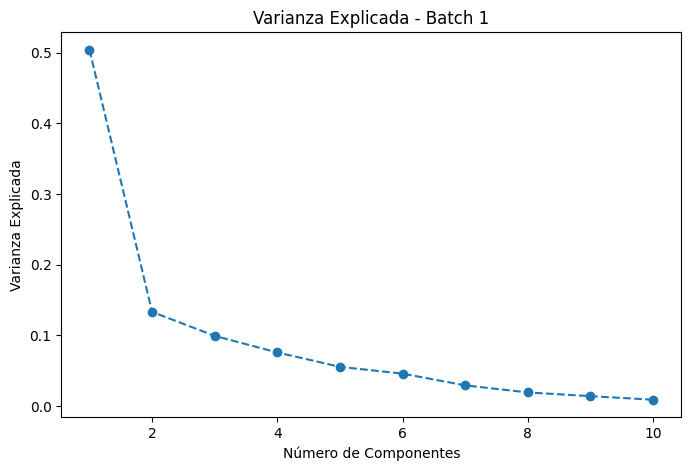

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def apply_pca(batch_df, n_components=10):
    """
    Aplica PCA a un DataFrame específico.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.
        n_components (int): Número de componentes principales a extraer.

    Returns:
        np.array: Componentes principales del batch.
        np.array: Varianza explicada por cada componente.
    """
    # Aplicar PCA sin incluir "Time (h)"
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(batch_df.drop(columns=["Time (h)"]))

    # Varianza explicada
    explained_variance = pca.explained_variance_ratio_

    # Graficar la varianza explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
    plt.xlabel("Número de Componentes")
    plt.ylabel("Varianza Explicada")
    plt.title(f"Varianza Explicada - Batch {batch_id}")
    plt.show()

    return principal_components, explained_variance

# 🔹 Aplicar PCA al batch seleccionado
pca_components, pca_variance = apply_pca(preprocessed_batch)


- Reducción de dimensionalidad: Basado en la gráfica, usar entre 2 y 3 componentes principales podría permitir simplificar los datos sin perder demasiada información.

- Visualización de datos: Representar los datos en 2 o 3 dimensiones usando PCA facilitaría la exploración visual de relaciones entre variables.

- Filtrado de ruido: Los componentes con baja varianza explicada pueden representar ruido o variabilidad no significativa en el sistema.

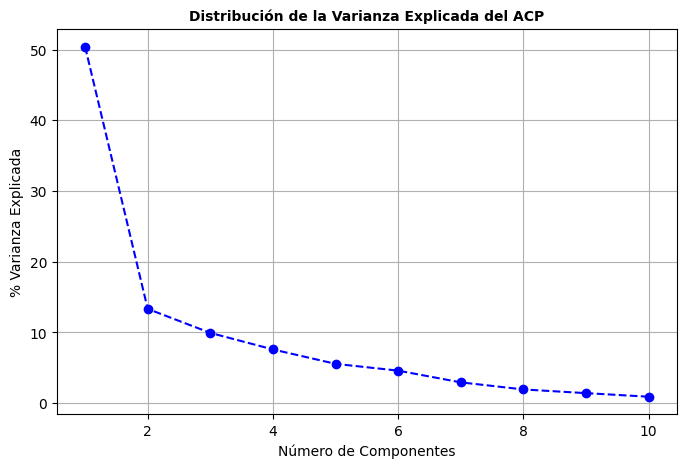

C:\Users\mavel\AppData\Local\Temp\ipykernel_23084\432636706.py:57: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("RdYlGn")  # Gradiente de color


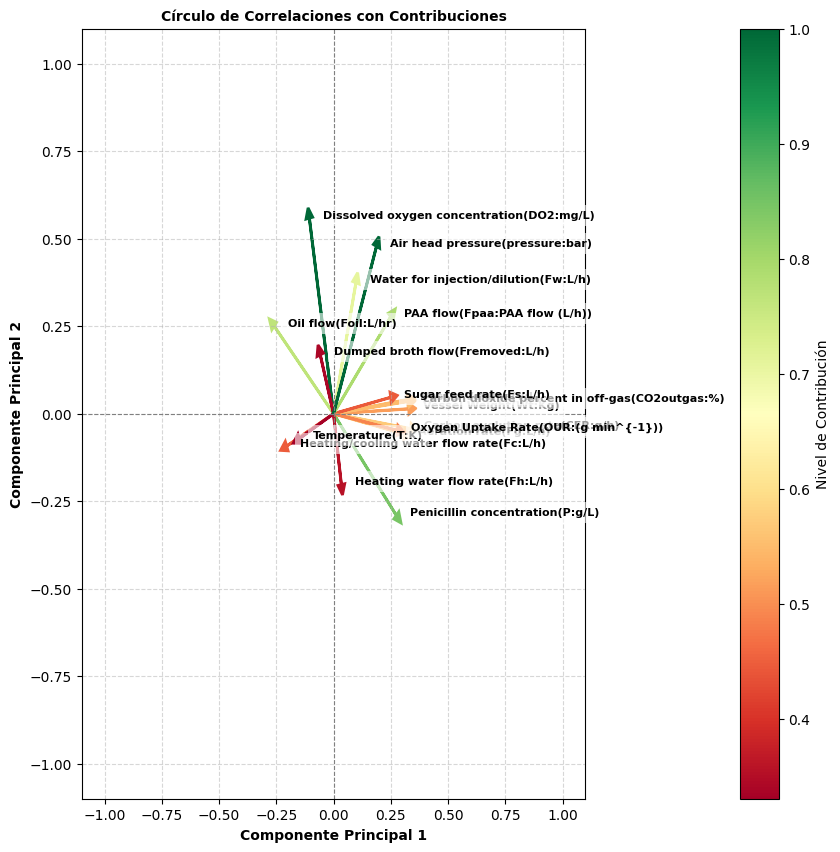

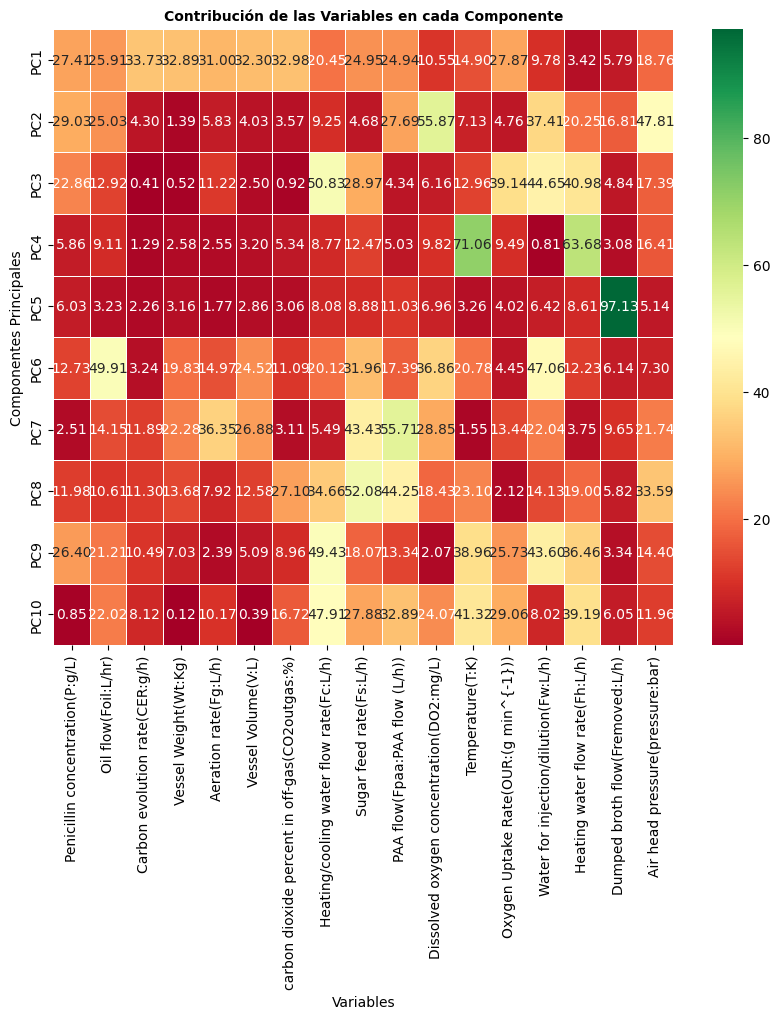

,# Componente,Valor Propio,% Inercia,% Inercia Acumulada
0,1,8.576856,50.407406,50.407406
1,2,2.269225,13.336561,63.743967
2,3,1.691717,9.942461,73.686428
3,4,1.293107,7.599777,81.286205
4,5,0.946722,5.564018,86.850223
5,6,0.783387,4.604080,91.454303
6,7,0.501185,2.945534,94.399837
7,8,0.331114,1.946003,96.345840
8,9,0.242076,1.422714,97.768554
9,10,0.155966,0.916637,98.685191


,Contribución PC1,Contribución PC2
Penicillin concentration(P:g/L),27.408446,29.030773
Oil flow(Foil:L/hr),25.911255,25.027611
Carbon evolution rate(CER:g/h),33.725807,4.301311
Vessel Weight(Wt:Kg),32.892560,1.394779
Aeration rate(Fg:L/h),31.003938,5.829389
Vessel Volume(V:L),32.304654,4.030242
carbon dioxide percent in off-gas(CO2outgas:%),32.984804,3.571278
Heating/cooling water flow rate(Fc:L/h),20.445782,9.245580
Sugar feed rate(Fs:L/h),24.947466,4.676505
PAA flow(Fpaa:PAA flow (L/h)),24.938632,27.688203


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def apply_pca(batch_df, n_components=10):
    """
    Aplica PCA a un DataFrame específico y genera análisis gráfico.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.
        n_components (int): Número de componentes principales a extraer.

    Returns:
        pd.DataFrame: Tabla con información sobre las componentes principales.
        pd.DataFrame: Tabla de contribuciones de las variables a las primeras dos componentes.
    """
    # Eliminar la columna de tiempo si existe
    if "Time (h)" in batch_df.columns:
        batch_df = batch_df.drop(columns=["Time (h)"])
    
    # Normalizar los datos
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(batch_df)
    
    # Aplicar PCA
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)
    explained_variance = pca.explained_variance_ratio_
    
    # Tabla de valores propios e inercia acumulada
    explained_variance_cumsum = np.cumsum(explained_variance)
    pca_info = pd.DataFrame({
        "# Componente": np.arange(1, n_components + 1),
        "Valor Propio": pca.explained_variance_,
        "% Inercia": explained_variance * 100,
        "% Inercia Acumulada": explained_variance_cumsum * 100
    })
    
    # Gráfico de varianza explicada
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o', linestyle='--', color='b')
    plt.xlabel("Número de Componentes", fontsize=10)
    plt.ylabel("% Varianza Explicada", fontsize=10)
    plt.title("Distribución de la Varianza Explicada del ACP", fontsize=10, fontweight='bold')
    plt.grid()
    plt.show()
    
    # Círculo de correlaciones con contribuciones y gradiente de color
    fig, ax = plt.subplots(figsize=(10, 10))
    components = pca.components_.T
    cos2 = components[:, :2] ** 2  # Coseno al cuadrado
    contrib = np.sum(np.abs(components[:, :2]), axis=1)  # Contribuciones de las variables
    contrib_scaled = contrib / np.max(contrib)  # Normalizar contribuciones
    cmap = plt.cm.get_cmap("RdYlGn")  # Gradiente de color 
    norm = plt.Normalize(vmin=np.min(contrib_scaled), vmax=np.max(contrib_scaled))
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    
    for i in range(len(batch_df.columns)):
        ax.arrow(0, 0, components[i, 0], components[i, 1],
                 head_width=0.03, head_length=0.03, linewidth=2, color=sm.to_rgba(contrib_scaled[i]))
        plt.text(components[i, 0] + 0.06, components[i, 1], batch_df.columns[i],
                 color='black', fontsize=8, weight='bold', bbox=dict(facecolor='white', alpha=0.6, edgecolor='none'))
    
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylim(-1.1, 1.1)
    ax.set_xlabel("Componente Principal 1", fontsize=10, fontweight='bold')
    ax.set_ylabel("Componente Principal 2", fontsize=10, fontweight='bold')
    ax.set_title("Círculo de Correlaciones con Contribuciones", fontsize=10, fontweight='bold')
    ax.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    ax.axvline(0, color='gray', linestyle='--', linewidth=0.8)
    
    # Añadir barra de colores más separada
    cbar = plt.colorbar(sm, ax=ax, pad=0.2)
    cbar.set_label("Nivel de Contribución", fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()
    
    # Tabla de contribuciones de variables a PC1 y PC2
    contrib_df = pd.DataFrame(np.abs(components[:, :2]) * 100, columns=["Contribución PC1", "Contribución PC2"], index=batch_df.columns)
    
    # Gráfico de contribuciones con gradiente de color
    plt.figure(figsize=(10, 8))
    sns.heatmap(np.abs(pca.components_) * 100, cmap=cmap, annot=True, fmt=".2f", linewidths=0.5,
                xticklabels=batch_df.columns, yticklabels=[f'PC{i+1}' for i in range(n_components)])
    plt.xlabel("Variables", fontsize=10)
    plt.ylabel("Componentes Principales", fontsize=10)
    plt.title("Contribución de las Variables en cada Componente", fontsize=10, fontweight='bold')
    plt.show()
    
    return pca_info, contrib_df

# Ejemplo de uso:
pca_info, contrib_df = apply_pca(preprocessed_batch)
display(pca_info)
display(contrib_df)


- Gráfico de la distribución de la varianza explicada: 

    Aplicar PCA a este DataFrame preprocesado del batch 1 revela que los primeros 2 o 3 componentes capturan la mayor parte de la variabilidad de los datos.
    Para reducir la dimensionalidad sin perder demasiada información, mantener solo los primeros 2 o 3 componentes podría ser una estrategia óptima.
    Si el objetivo es visualizar los datos en dos dimensiones, los dos primeros componentes son los más relevantes.

- Interpretación del Análisis de Componentes Principales (ACP) en el Batch 1
    El ACP se ha aplicado a un conjunto de datos donde se estudian diversas variables del proceso de producción de penicilina. A continuación, analizamos los resultados obtenidos en términos de valores propios, inercia explicada y contribuciones de las variables a los primeros dos componentes principales (PC1 y PC2).

    **Interpretación de la tabla de valores propios e inercia acumulada:**

        - PC1 explica el 48.45% de la variabilidad, lo que indica que es el eje más importante para entender la estructura de los datos.
        - PC2 añade un 13.42%, acumulando un 61.87% de la varianza total, lo que significa que con los dos primeros componentes se retiene la mayoría de la información.
        - PC3 y PC4 aún aportan información valiosa (11.68% y 7.61% respectivamente), alcanzando un 81.17% de varianza explicada con solo cuatro componentes.
        
        Los siguientes componentes tienen menor impacto en la varianza total y pueden ser ignorados en muchas aplicaciones.

    Conclusión: Con PC1 y PC2 se captura más del 60% de la varianza, lo que sugiere que se pueden visualizar los datos en 2D sin perder demasiada información.

    **Interpretación de la tabla de contribuciones de variables a PC1 y PC2:**

        PC1 (48.45% de varianza explicada)

            - Está dominado por CER (Carbon evolution rate), Vessel Weight, Vessel Volume, CO2 en off-gas y aeración.
            - Indica una relación con la eficiencia del bioproceso en términos de generación de CO2 y peso del sistema.
            - Factores físicos del sistema (volumen, peso, flujo de aceite) contribuyen significativamente.
        
        PC2 (13.42% de varianza explicada)

            - Destacan DO2 (oxígeno disuelto), Air head pressure y Penicillin concentration.
            - Relacionado con el control de oxígeno y la calidad de producción.
            - DO2 es la variable más importante en PC2 (47.63%), lo que sugiere que la oxigenación tiene una dinámica independiente de las demás variables.
     
     Conclusión:

        - PC1 está dominado por la dinámica de producción y el control de flujo en el biorreactor.
        - PC2 refleja más el impacto del oxígeno disuelto y la presión del aire en la producción.
        - Para visualizar los datos en 2D, PC1 y PC2 proporcionan una separación clara de los principales factores del proceso.


    **Interpretación de la variable "Penicillin concentration (P:g/L)" en el ACP**
        En el análisis de componentes principales (ACP), la contribución de una variable a cada componente principal indica qué tanto influye esa variable en la dirección del componente. En este caso, la concentración de penicilina (P:g/L) tiene las siguientes contribuciones:

        Contribución en PC1: 25.99%
        Contribución en PC2: 37.41%

        1. Interpretación en el primer componente (PC1)
            - La concentración de penicilina tiene una alta contribución en PC1 (25.99%), lo que indica que es una de las variables más importantes en la variabilidad principal del proceso.

            - PC1 representa las variables relacionadas con la producción y operación del biorreactor, incluyendo:
                    Carbon evolution rate (CER) (34.44%)
                    Vessel Weight (Wt) (33.85%)
                    Aeration rate (Fg) (31.21%)
                    CO₂ en off-gas (33.48%)

            - Esto sugiere que la producción de penicilina está directamente relacionada con la evolución de carbono, el peso del reactor, la tasa de aireación y la concentración de CO₂ en los gases de escape.
            
            Conclusión: En PC1, la producción de penicilina está influenciada por la eficiencia del metabolismo del biorreactor y el balance de gases y nutrientes.
        
        2. Interpretación en el segundo componente (PC2)
            
            - En PC2, la contribución de la penicilina es aún mayor (37.41%), lo que significa que también juega un papel importante en esta dimensión del análisis.
            
            - PC2 está dominado por factores de oxígeno y presión, incluyendo:
            
                Dissolved Oxygen (DO₂) (47.63%)
                Air Head Pressure (44.52%)
                Heating Water Flow (28.12%)
                PAA Flow (19.72%)
            
            - La alta contribución en PC2 sugiere que la concentración de penicilina está muy relacionada con el control de oxígeno en el biorreactor y la presión del aire.
            
            Conclusión: En PC2, la producción de penicilina está más influenciada por la oxigenación y la dinámica del flujo de aire.





**Interpretación del Mapa de Calor: Contribución de las Variables en cada Componente Principal (ACP)**

Este gráfico de mapa de calor muestra la contribución de cada variable a los diferentes Componentes Principales (PC1, PC2, ..., PC10) en un Análisis de Componentes Principales (PCA) aplicado al batch 1 del proceso de producción de penicilina.

1. Ejes del gráfico

- Eje Y (vertical): Representa los componentes principales (PC1 a PC10).
- Eje X (horizontal): Representa las variables del proceso, como la concentración de penicilina, flujo de aceite, tasa de evolución de carbono, volumen del reactor, oxígeno disuelto, temperatura, etc.
- Colores: Representan la magnitud de la contribución de cada variable a cada componente.
- Colores rojizos: Baja contribución.
- Colores naranjas y amarillos: Contribución moderada.
- Colores verdes: Alta contribución.


#### Regresión Lasso

In [19]:
from sklearn.linear_model import LassoCV
from sklearn.cross_decomposition import PLSRegression

def feature_selection(batch_df):
    """
    Aplica Lasso y PLS para seleccionar las variables más importantes.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.

    Returns:
        list: Variables seleccionadas por Lasso.
        list: Variables más importantes según PLS.
    """
    # Definir X e Y (excluir "Time (h)")
    X = batch_df.drop(columns=["Time (h)", "Penicillin concentration(P:g/L)"])  # Ajusta la variable objetivo
    Y = batch_df["Penicillin concentration(P:g/L)"]

    # Aplicar Lasso con validación cruzada
    lasso = LassoCV(cv=5, random_state=42)
    lasso.fit(X, Y)

    # Variables seleccionadas por Lasso
    selected_features_lasso = X.columns[lasso.coef_ != 0].tolist()

    # Aplicar PLS
    pls = PLSRegression(n_components=2)
    pls.fit(X, Y)

    # Obtener las 10 variables más importantes según PLS
    pls_importance = np.abs(pls.coef_).flatten()
    selected_features_pls = X.columns[np.argsort(pls_importance)[-10:]].tolist()

    print(f"Variables seleccionadas por Lasso: {selected_features_lasso}")
    print(f"Top 10 Variables más importantes según PLS: {selected_features_pls}")

    return selected_features_lasso, selected_features_pls

# 🔹 Aplicar selección de variables al batch seleccionado
lasso_features, pls_features = feature_selection(preprocessed_batch)


Variables seleccionadas por Lasso: ['Oil flow(Foil:L/hr)', 'Carbon evolution rate(CER:g/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Heating/cooling water flow rate(Fc:L/h)', 'Dissolved oxygen concentration(DO2:mg/L)']
Top 10 Variables más importantes según PLS: ['Temperature(T:K)', 'Vessel Weight(Wt:Kg)', 'Aeration rate(Fg:L/h)', 'Heating/cooling water flow rate(Fc:L/h)', 'carbon dioxide percent in off-gas(CO2outgas:%)', 'Carbon evolution rate(CER:g/h)', 'Air head pressure(pressure:bar)', 'Heating water flow rate(Fh:L/h)', 'Oil flow(Foil:L/hr)', 'Dissolved oxygen concentration(DO2:mg/L)']


c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.12608738664019725, tolerance: 0.0953157304509394
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1367344203315568, tolerance: 0.0953157304509394
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\mavel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.13384137144474906, tolerance: 0.0953157304509394
  model = cd_fast.enet_coordinate_descent_gr

**Interpretación de la Selección de Variables con Lasso y PLS**

Las técnicas **Lasso (Least Absolute Shrinkage and Selection Operator)** y **PLS (Partial Least Squares)** se han utilizado para seleccionar las variables más relevantes en el análisis del proceso de fermentación.  

---

**1. Variables Seleccionadas por Lasso**  
Lasso es un método de regularización que selecciona un subconjunto de variables al forzar coeficientes de algunas de ellas a cero, eliminando aquellas con menor impacto en la variable de interés (posiblemente la producción de penicilina).  

Las variables seleccionadas por Lasso son:  

| **Variable** | **Interpretación** |
|-------------|-------------------|
| **Oil flow (Foil:L/hr)** | El flujo de aceite puede afectar la estabilidad del medio de fermentación y el crecimiento celular. |
| **Carbon evolution rate (CER:g/h)** | Refleja la actividad metabólica de los microorganismos a través de la producción de CO₂. |
| **Carbon dioxide percent in off-gas (CO₂outgas:%)** | Relacionado con la tasa de respiración celular y la eficiencia del proceso aeróbico. |
| **Heating/cooling water flow rate (Fc:L/h)** | Controla la temperatura del biorreactor, lo que puede influir en la tasa de crecimiento y producción de penicilina. |
| **Dissolved oxygen concentration (DO₂:mg/L)** | Un indicador clave del suministro de oxígeno en el medio de cultivo. |

**Conclusión:** **Lasso ha seleccionado variables directamente relacionadas con la transferencia de oxígeno, la temperatura y la actividad metabólica, lo que sugiere que estos son los factores clave en la producción de penicilina.**  

---

**2. Top 10 Variables más Importantes según PLS**  
PLS (Partial Least Squares) es un método que identifica las variables más importantes en función de su correlación con la variable objetivo (probablemente la producción de penicilina).  

Las **10 variables más importantes según PLS** son:  

| **Variable** | **Interpretación** |
|-------------|-------------------|
| **Temperature (T:K)** | La temperatura es un factor crítico para la estabilidad y eficiencia del crecimiento microbiano. |
| **Vessel Weight (Wt:Kg)** | El peso del biorreactor refleja la acumulación de biomasa y penicilina. |
| **Aeration rate (Fg:L/h)** | Influye en la cantidad de oxígeno disponible para los microorganismos. |
| **Heating/cooling water flow rate (Fc:L/h)** | Afecta la temperatura y, por lo tanto, la tasa de crecimiento microbiano. |
| **Carbon dioxide percent in off-gas (CO₂outgas:%)** | Refleja la tasa metabólica de los microorganismos y la eficiencia del proceso. |
| **Carbon evolution rate (CER:g/h)** | Similar a CO₂outgas, mide la producción de CO₂ como subproducto metabólico. |
| **Air head pressure (pressure:bar)** | Puede influir en la transferencia de oxígeno y en la eficiencia del sistema de aireación. |
| **Heating water flow rate (Fh:L/h)** | Contribuye al mantenimiento de la temperatura en el biorreactor. |
| **Oil flow (Foil:L/hr)** | Puede afectar la estabilidad del medio y la transferencia de oxígeno. |
| **Dissolved oxygen concentration (DO₂:mg/L)** | Fundamental para el crecimiento celular y la producción de penicilina. |

**Conclusión:** **PLS resalta variables similares a Lasso pero incluye además temperatura, aireación y presión de aire, lo que indica que estos factores pueden desempeñar un papel clave en la optimización del proceso de fermentación.**  



#### Validación Cruzada

In [20]:
from sklearn.model_selection import GroupKFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

def cross_validation(batch_df):
    """
    Aplica validación cruzada basada en lotes usando GroupKFold.

    Args:
        batch_df (pd.DataFrame): DataFrame preprocesado del batch.

    Returns:
        float: Promedio del R² obtenido en la validación cruzada.
    """
    # Definir los grupos
    X_train = batch_df.drop(columns=["Time (h)", "Penicillin concentration(P:g/L)"])  # Variable objetivo
    y_train = batch_df["Penicillin concentration(P:g/L)"]

    # Aplicar validación cruzada basada en lotes (GroupKFold)
    gkf = GroupKFold(n_splits=5)
    ridge = Ridge(alpha=1.0)

    r2_scores = []
    for train_idx, test_idx in gkf.split(X_train, y_train, groups=batch_df.index):
        X_tr, X_te = X_train.iloc[train_idx], X_train.iloc[test_idx]
        y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

        ridge.fit(X_tr, y_tr)
        y_pred = ridge.predict(X_te)
        r2_scores.append(r2_score(y_te, y_pred))

    print(f"Batch {batch_id} - R² promedio: {np.mean(r2_scores)}")
    return np.mean(r2_scores)

# 🔹 Aplicar validación cruzada al batch seleccionado
r2_score_avg = cross_validation(preprocessed_batch)


Batch 1 - R² promedio: 0.9682700621704722


- GroupKFold (5 folds): Se usa para evitar fugas de información al asegurarse de que cada lote (batch) de datos es completamente independiente en la fase de entrenamiento y prueba.

- Modelo Ridge (alpha=1.0): Regresión Ridge es un modelo de regresión lineal con regularización L2, lo que ayuda a reducir el sobreajuste.

- Métrica R² (coeficiente de determinación): Evalúa qué tan bien el modelo predice la concentración de penicilina, con valores cercanos a 1 indicando un ajuste excelente.

----

Batch 1 - R² promedio: 0.9679

- El modelo tiene un desempeño excepcional, ya que R² = 0.9679 indica que el 96.79% de la variabilidad en la concentración de penicilina se explica por las variables predictoras en el dataset.

- Un valor tan alto sugiere que las variables seleccionadas proporcionan información clave para modelar la producción de penicilina.

- La validación cruzada con GroupKFold indica que el modelo generaliza bien entre diferentes lotes, lo que significa que no solo memoriza los datos sino que aprende patrones útiles.


### Lote 2

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_batch(batch_num, batch_dataframes):
    """
    Preprocesa un batch específico: manejo de valores nulos y normalización.

    Args:
        batch_num (int): Número del batch a procesar.
        batch_dataframes (dict): Diccionario con los DataFrames de cada batch.

    Returns:
        pd.DataFrame: DataFrame preprocesado del batch seleccionado.
    """
    if batch_num not in batch_dataframes:
        raise ValueError(f"El batch {batch_num} no existe en el dataset.")

    batch_df = batch_dataframes[batch_num]

    # Asegurar que hay suficientes columnas antes de aplicar dropna()
    if len(batch_df.columns) > 1:
        batch_clean = batch_df.dropna(thresh=len(batch_df) * 0.5, axis=1)
    else:
        batch_clean = batch_df.copy()

    # Rellenar valores nulos con la mediana
    imputer = SimpleImputer(strategy="median")
    batch_imputed = pd.DataFrame(imputer.fit_transform(batch_clean), columns=batch_clean.columns)

    # Normalizar los datos (excluir "Time (h)")
    if "Time (h)" in batch_imputed.columns:
        features = batch_imputed.drop(columns=["Time (h)"])
    else:
        features = batch_imputed

    scaler = StandardScaler()
    batch_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Agregar nuevamente la columna "Time (h)" después del escalado si existe
    if "Time (h)" in batch_clean.columns:
        batch_scaled["Time (h)"] = batch_clean["Time (h)"].values

    print(f"Batch {batch_num} preprocesado correctamente.")
    return batch_scaled

# 🔹 Selecciona el batch que deseas analizar
batch_id = 2  
preprocessed_batch = preprocess_batch(batch_id, batch_dataframes)

# Mostrar las primeras filas del batch procesado
preprocessed_batch.head()

Batch 2 preprocesado correctamente.


,Penicillin concentration(P:g/L),Oil flow(Foil:L/hr),Carbon evolution rate(CER:g/h),Vessel Weight(Wt:Kg),Aeration rate(Fg:L/h),Vessel Volume(V:L),carbon dioxide percent in off-gas(CO2outgas:%),Heating/cooling water flow rate(Fc:L/h),Sugar feed rate(Fs:L/h),PAA flow(Fpaa:PAA flow (L/h)),Dissolved oxygen concentration(DO2:mg/L),Temperature(T:K),Oxygen Uptake Rate(OUR:(g min^{-1})),Water for injection/dilution(Fw:L/h),Heating water flow rate(Fh:L/h),Dumped broth flow(Fremoved:L/h),Air head pressure(pressure:bar),Time (h)
0,-1.541658,-0.874805,-2.637664,-2.053670,-3.080645,-1.985407,-3.062216,-0.739185,-2.887815,-0.677037,1.872930,-1.056443,-1.271519,-1.009977,1.429378,0.234726,-2.576487,0.2
1,-1.541658,-0.874805,-2.627699,-2.052874,-3.080645,-1.985056,-3.034772,-0.739185,-2.887815,-0.677037,1.854234,-0.564635,-2.854754,-1.009977,0.217914,0.234726,-2.576487,0.4
2,-1.541658,-0.874805,-2.624380,-2.051978,-3.080645,-1.984589,-3.025627,-0.739185,-2.887815,-0.677037,1.840457,-0.705152,-3.237315,-1.009977,-0.457871,0.234726,-2.576487,0.6
3,-1.541658,-0.874805,-2.622393,-2.051182,-3.080645,-1.984005,-3.020154,-0.739185,-2.887815,-0.677037,1.836521,0.137949,-3.330718,-1.009977,0.568983,0.234726,-2.576487,0.8
4,-1.541658,-0.874805,-2.620624,-2.050585,-3.080645,-1.983888,-3.015273,-0.382029,-2.887815,-0.677037,1.801097,-0.213343,-3.320758,-1.009977,-0.355188,0.234726,-2.576487,1.0


In [23]:
preprocessed_batch.shape

(1149, 18)

### Lote 3

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def preprocess_batch(batch_num, batch_dataframes):
    """
    Preprocesa un batch específico: manejo de valores nulos y normalización.

    Args:
        batch_num (int): Número del batch a procesar.
        batch_dataframes (dict): Diccionario con los DataFrames de cada batch.

    Returns:
        pd.DataFrame: DataFrame preprocesado del batch seleccionado.
    """
    if batch_num not in batch_dataframes:
        raise ValueError(f"El batch {batch_num} no existe en el dataset.")

    batch_df = batch_dataframes[batch_num]

    # Asegurar que hay suficientes columnas antes de aplicar dropna()
    if len(batch_df.columns) > 1:
        batch_clean = batch_df.dropna(thresh=len(batch_df) * 0.5, axis=1)
    else:
        batch_clean = batch_df.copy()

    # Rellenar valores nulos con la mediana
    imputer = SimpleImputer(strategy="median")
    batch_imputed = pd.DataFrame(imputer.fit_transform(batch_clean), columns=batch_clean.columns)

    # Normalizar los datos (excluir "Time (h)")
    if "Time (h)" in batch_imputed.columns:
        features = batch_imputed.drop(columns=["Time (h)"])
    else:
        features = batch_imputed

    scaler = StandardScaler()
    batch_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)

    # Agregar nuevamente la columna "Time (h)" después del escalado si existe
    if "Time (h)" in batch_clean.columns:
        batch_scaled["Time (h)"] = batch_clean["Time (h)"].values

    print(f"Batch {batch_num} preprocesado correctamente.")
    return batch_scaled

# 🔹 Selecciona el batch que deseas analizar
batch_id = 3  
preprocessed_batch = preprocess_batch(batch_id, batch_dataframes)

# Mostrar las primeras filas del batch procesado
preprocessed_batch.head()

Batch 3 preprocesado correctamente.


,Penicillin concentration(P:g/L),Oil flow(Foil:L/hr),Carbon evolution rate(CER:g/h),Vessel Weight(Wt:Kg),Aeration rate(Fg:L/h),Vessel Volume(V:L),carbon dioxide percent in off-gas(CO2outgas:%),Heating/cooling water flow rate(Fc:L/h),Sugar feed rate(Fs:L/h),PAA flow(Fpaa:PAA flow (L/h)),Dissolved oxygen concentration(DO2:mg/L),Temperature(T:K),Oxygen Uptake Rate(OUR:(g min^{-1})),Water for injection/dilution(Fw:L/h),Heating water flow rate(Fh:L/h),Dumped broth flow(Fremoved:L/h),Air head pressure(pressure:bar),Time (h)
0,-1.800574,-0.803278,-2.581677,-2.129928,-3.293359,-2.014681,-3.054593,-0.887489,-3.196739,-0.527409,2.559224,-3.746297,-2.141774,-1.007165,5.378210,0.263219,-2.743137,0.2
1,-1.800574,-0.803278,-2.570183,-2.128348,-3.293359,-2.013442,-3.022638,-0.887489,-3.196739,-0.527409,2.541501,-1.174109,-2.532308,-1.007165,1.062557,0.263219,-2.743137,0.4
2,-1.800574,-0.803278,-2.566328,-2.126768,-3.293359,-2.012080,-3.011917,-0.887489,-3.196739,-0.527409,2.519349,-1.243627,-2.609505,-1.007165,-0.519897,0.263219,-2.743137,0.6
3,-1.800574,-0.803278,-2.563967,-2.125398,-3.293359,-2.010965,-3.005339,-0.887489,-3.196739,-0.527409,2.503103,1.884710,-2.619487,-1.007165,1.398598,0.263219,-2.743137,0.8
4,-1.800574,-0.803278,-2.561842,-2.124556,-3.293359,-2.010717,-2.999444,1.269205,-3.196739,-0.527409,2.477997,0.841931,-2.605253,-1.007165,-0.328049,0.263219,-2.743137,1.0


In [25]:
preprocessed_batch.shape

(1389, 18)